# Random Forest
Random Forest is a machine learning ensemble method developed in 2001. It makes uses of several decision trees, creating a "forest". The final value will be given by the average over all the trees' predicition. 

In [1]:
# Let's call all our friends to the party

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
import seaborn as sns

from sklearn import linear_model

from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import r2_score
import sklearn.metrics as metrics


# from sklearn.ensemble import ExtraTreesRegeressor

In [2]:
# Import preprocessed data

# data = pd.read_excel('../preprocessing/regDataPca.xlsx')
# data = pd.read_excel('regDataPca.xlsx')
data = pd.read_excel('regressionData.xlsx')
display(data)

,id number,Mean radius,Mean texture,Mean perimeter,Mean area,Mean smothness,Mean compactness,Mean concavity,Mean concave points,Mean symmetry,...,Worst area,Worst smothness,Worst compactness,Worst concavity,Worst concave points,Worst symmetry,Worst fractal dimension,Tumour Size,Lymph node status,Time
0,119513,18.02,27.60,117.50,1013.0,0.09489,0.10360,0.10860,0.07055,0.1865,...,1436.0,0.11950,0.1926,0.3140,0.11700,0.2677,0.08113,5.0,5,31
1,8423,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,2019.0,0.16220,0.6656,0.7119,0.26540,0.4601,0.11890,3.0,2,61
2,842517,21.37,17.44,137.50,1373.0,0.08836,0.11890,0.12550,0.08180,0.2333,...,1949.0,0.11880,0.3449,0.3414,0.20320,0.4334,0.09067,2.5,0,116
3,843483,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,567.7,0.20980,0.8663,0.6869,0.25750,0.6638,0.17300,2.0,0,123
4,843584,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,1575.0,0.13740,0.2050,0.4000,0.16250,0.2364,0.07678,3.5,0,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,942640,22.52,21.92,146.90,1597.0,0.07592,0.09162,0.06862,0.06367,0.1728,...,1902.0,0.08191,0.1319,0.1056,0.09378,0.2061,0.05788,6.0,2,10
194,943471,15.44,31.18,101.00,740.4,0.09399,0.10620,0.13750,0.06500,0.1735,...,929.0,0.12720,0.2362,0.2975,0.12860,0.2914,0.08024,1.5,0,8
195,94547,17.17,29.19,110.00,915.3,0.08952,0.06655,0.06583,0.05068,0.1793,...,1295.0,0.12610,0.1572,0.2141,0.09520,0.3362,0.06033,3.7,0,12
196,947204,21.42,22.84,145.00,1440.0,0.10700,0.19390,0.23800,0.13180,0.1884,...,2375.0,0.14980,0.4379,0.5411,0.22150,0.2832,0.08981,3.0,3,3


In [3]:
target = ['Time']
y = data[target[0]].values # Response variable
X = data.drop(labels=["id number",target[0]], axis = 1) # Design Matrix


Random Forest is based on the partition of the data. Hence, it does not need any scaling or numerical preprocessing.

In [4]:
#define function to calcuate evaluation matrices for each model 


def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    r2_adjusted = 1 - (1-r2_square)*(len(true)-1)/(len(true)-X.shape[1]-1)
    return mae, mse, rmse, r2_square

In [5]:
#print alredy evaluated matrices values

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    r2_adjusted = 1 - (1-r2_square)*(len(true)-1)/(len(true)-X.shape[1]-1)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('_ _ _ _ _ _ _ _ _ _  _ _ _ ')
    print('R2 Square', r2_square)
    print('_ _ _ _ _ _ _ _ _ _  _ _ _ ')
    print('R2 adjusted square', r2_adjusted)
    print('__________________________________')

In [6]:
#To have better idea we will vizualize our results
#Histogram of the predicted values and the actual values

from sklearn import metrics

def Histo_prediction_true(model):
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    plt.figure(figsize=(10,5))
    sns.distplot(y_test, hist=True, kde=False, bins=30, color='pink')
    sns.distplot(prediction, hist=True, kde=False, bins=30, color='blue')
    plt.legend(labels=['Actual Values of time', 'Predicted Values of time'])
    plt.xlim(0,)

In [7]:
#this function will plot a scatter plot of the predicted values and the fit line for the test data

def Pred_Real_Model(model):
    model.fit(X_train, y_train)
    prediction=model.predict(X_test)
    x_ax = range(len(X_test))
    plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
    plt.plot(x_ax, prediction, lw=0.8, color="red", label="predicted")
    plt.show()

In [8]:
def Fitfunction(model):
    # plotting the y_test vs y_pred
# ideally should have been a straight line
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    plt.scatter(y_test, prediction, color='purple')
#add a line to show the perfect prediction
    plt.plot(y_test, y_test, color='red')
    plt.xlabel('Y Test')
    plt.ylabel('Predicted Y')
    
    plt.show()

In [9]:
#this is just for results interpretation

def Result(model):
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    print(prediction)
    print('Predicted result:\n_____________________________________')

    print(np.dot(X,model.coef_) + model.intercept_)

In [10]:
# make a function to measure regression model accuracy for each model
# ALREDY INCLUDED IN EVALUATE FUNCTION SO WE DONT NEED THIS FUNCTION, 
# BUT THIS ONE WE CAN CALL TO SEE THE RESULTS, SO WE WILL KEEP IT

def regression_accuracy(model):
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    print('R2 score:', metrics.r2_score(y_test, prediction))
    print('Adjusted R2 score:', 1 - (1-metrics.r2_score(y_test, prediction))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
    print('__________________________________')

In [11]:
#make a function to vizualize accuracy of each model

def vizualize_accuracy(model):
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    plt.figure(figsize=(10,5))
    plt.scatter(y_test, prediction, color='purple')
    plt.plot(y_test, y_test, color='red')
    plt.xlabel('Y Test')
    plt.ylabel('Predicted Y')
    plt.show()

# Random Forest Regressor

In [12]:
from sklearn.ensemble import RandomForestRegressor # The estimator. Its performance and capability
                                                   # to recreate the data will be tested in this code

RFR_std = RandomForestRegressor() # we allow the default values. Then the hyperparameters will undergo an optimization process

from sklearn.model_selection import train_test_split # Standard split in machine learning. 
                                                     # Who are we to change the modus operandi?
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Applying the Random Forest Regressor to the Train data
RFR_std.fit(X_train,y_train)

y_test_predRF = RFR_std.predict(X_test)
y_train_predRF = RFR_std.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, y_test_predRF)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, y_train_predRF)

Test set evaluation:
_____________________________________
MAE: 25.937
MSE: 1003.6768849999999
RMSE: 31.680859915728295
_ _ _ _ _ _ _ _ _ _  _ _ _ 
R2 Square 0.10251319306705209
_ _ _ _ _ _ _ _ _ _  _ _ _ 
R2 adjusted square -4.000283638626423
__________________________________
Train set evaluation:
_____________________________________
MAE: 10.95879746835443
MSE: 171.55771455696203
RMSE: 13.098004220375028
_ _ _ _ _ _ _ _ _ _  _ _ _ 
R2 Square 0.8539076497956233
_ _ _ _ _ _ _ _ _ _  _ _ _ 
R2 adjusted square 0.8165080081433028
__________________________________


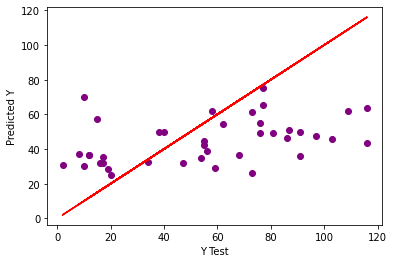

In [13]:
Fitfunction(RFR_std)

In [14]:
# fig, ax = plt.subplots()
# ax.scatter(y, y_test_predRF, c= 'pink', label = 'model', edgecolor = 'k')
# ax.set_xlabel('Data [Time]')
# ax.set_ylabel('Prediction [Time]')
# ax.plot(y, y, label='Ideal')
# ax.legend()

Quite frankly, It sucks

C:\Users\andre\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


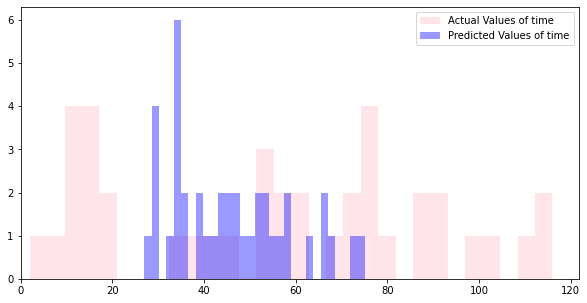

In [15]:
Histo_prediction_true(RFR_std)

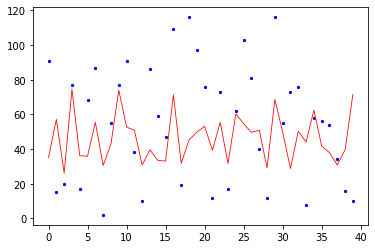

In [16]:
Pred_Real_Model(RFR_std)

In [17]:
regression_accuracy(RFR_std)

R2 score: 0.12173107302196196
Adjusted R2 score: -3.893212593163355
__________________________________


# Bootstraping

Sci-kit learn random forest regressor has included an option wheter to include or not bootstraping when sampling the trees.
In the next lines of code and figure, it can be appreciated the MSE when taking into account bootstraping or not.

<Figure size 432x288 with 0 Axes>

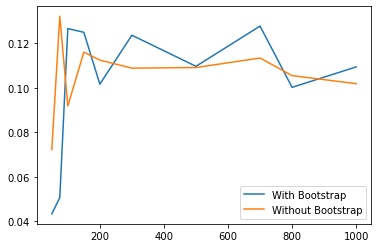

In [18]:
# from sklearn import metrics
# from sklearn.model_selection import cross_val_score
n_estimators = [50, 75, 100, 150, 200, 300, 500, 700, 800, 1000]
MSE_B = np.empty(len(n_estimators))
MSE_NB = np.empty(len(n_estimators))
i = 0

for n in n_estimators:
    RFR_B = RandomForestRegressor(n_estimators=n,max_depth=3,max_features='sqrt', bootstrap=True)
    RFR_NB = RandomForestRegressor(n_estimators=n,max_depth=3,max_features='sqrt', bootstrap=False)
    
    MSE_B[i] = RFR_B.fit(X_train,y_train).score(X_test, y_test)
    MSE_NB[i] = RFR_NB.fit(X_train,y_train).score(X_test, y_test)
    i += 1

fig = plt.figure()
fig, ax = plt.subplots()
ax.plot(n_estimators, MSE_B, label='With Bootstrap')
ax.plot(n_estimators, MSE_NB, label='Without Bootstrap')
ax.set_title('')
ax.legend()


# Optimization 

Certainly, given a certain machine learning method, the goal is to extract as much information as possible. There are several aspects of the Random Forest Regressor to manipulate for obtain the best predictions outcomes. Optimization of the Random Forest hyperparameters will proceed as follow. First, the use of *RandomizedSearchCV* for getting close to the parameteres values which enhance the performace of the method. The second step is exploting computers' brute-force power calculation by means of *GridSearchCV* in order to tailor the parameter's values towards the optimal predictor.

# Raw estimation of the optimal parameters

In [19]:
# Building the "map" where the good estimators might be located on

n_estimators = [25, 40, 50, 75, 100, 150, 200, 300, 500, 700, 800, 1000] # Check criterions
max_depth = [1, 2, 3, 5, 10, 20, 50 , None]
min_samples_split = [2,3,4,5]
min_samples_leaf = [1,2,3]
max_features = ["sqrt","log2", None]
bootstrap = [True, False]

hyperparameters = {'n_estimators': n_estimators,
                  'max_depth': max_depth,
                  'min_samples_split': min_samples_split,
                  'min_samples_leaf': min_samples_leaf,
                  'max_features': max_features,
                  'bootstrap': bootstrap}

In [20]:
# invoking the model selection tool 
from sklearn.model_selection import RandomizedSearchCV 


# a set of hyperparameters is provided to the function. Sampling randomly the hyperparameters (not all of them),
# the optimal one is search by cross-validation.


RFR = RandomForestRegressor()
RFR_search = RandomizedSearchCV(estimator= RFR, param_distributions=hyperparameters,n_iter=460, scoring= None, 
                                n_jobs=-1, refit=True, cv=10, verbose=1, random_state= 28, return_train_score=False)

RFR_search.fit(X_train, y_train)


Fitting 10 folds for each of 460 candidates, totalling 4600 fits


RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(), n_iter=460,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [1, 2, 3, 5, 10, 20, 50,
                                                      None],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 3],
                                        'min_samples_split': [2, 3, 4, 5],
                                        'n_estimators': [25, 40, 50, 75, 100,
                                                         150, 200, 300, 500,
                                                         700, 800, 1000]},
                   random_state=28, verbose=1)

In [21]:
print('The best candidate set of hyperparameters obtained is {}\n'.format(RFR_search.best_params_))

The best candidate set of hyperparameters obtained is {'n_estimators': 300, 'min_samples_split': 3, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_depth': 2, 'bootstrap': True}



# Exhaustive search for the optimal parameters in the estimated region
This corresponds to the second step of the optimization process. Once the "location" of the optimal parameters have been found, the hardcore digging begins in favor of finding the treasure. 

In [22]:
from sklearn.model_selection import GridSearchCV

opt_par = RFR_search.best_params_
param_grid = {'n_estimators':[], 'min_samples_split': [], 'min_samples_leaf': [], 
               'max_features':[], 'max_depth': [], 'bootstrap': []}

delta_n_estimators = [-30, -20, -10, 0, 10, 20, 30]
delta_min_samples_split = [-2, -1, 0, 1, 2]
delta_min_samples_leaf = [-2, -1, 0, 1, 2]
delta_max_depth = [-6, -4, -2, 0, 2, 4, 6]

param_grid["max_features"] = [opt_par["max_features"]]
param_grid["bootstrap"] = [opt_par["bootstrap"]]

for i in delta_n_estimators:
    if opt_par["n_estimators"] + i > 0:
        param_grid['n_estimators'].append(opt_par["n_estimators"] + i ) 

for i in delta_min_samples_split:
    if opt_par["min_samples_split"] + i > 1:
        param_grid['min_samples_split'].append(opt_par["min_samples_split"] + i)

for i in delta_min_samples_leaf:
    if opt_par["min_samples_leaf"] + i > 0:
        param_grid['min_samples_leaf'].append(opt_par["min_samples_leaf"] + i)
  
if opt_par["max_depth"] != None:
        for i in delta_max_depth:
            if opt_par["max_depth"] + i > 0:
                param_grid['max_depth'].append(opt_par["max_depth"] + i)
else: param_grid["max_depth"] = [opt_par["max_depth"]]

print(opt_par)
print(param_grid)

{'n_estimators': 300, 'min_samples_split': 3, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_depth': 2, 'bootstrap': True}
{'n_estimators': [270, 280, 290, 300, 310, 320, 330], 'min_samples_split': [2, 3, 4, 5], 'min_samples_leaf': [1, 2, 3, 4, 5], 'max_features': ['sqrt'], 'max_depth': [2, 4, 6, 8], 'bootstrap': [True]}


In [23]:
RFR_grid = GridSearchCV(estimator= RFR, param_grid= param_grid, n_jobs= -1, refit=True, cv= 10, verbose=1,
                        return_train_score=False)

In [24]:
RFR_grid.fit(X_train, y_train)

Fitting 10 folds for each of 560 candidates, totalling 5600 fits


GridSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [2, 4, 6, 8],
                         'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [2, 3, 4, 5],
                         'n_estimators': [270, 280, 290, 300, 310, 320, 330]},
             verbose=1)

In [25]:
print('The optimal values for the hyperparameters are: {} \n'.format(RFR_grid.best_params_))


The optimal values for the hyperparameters are: {'bootstrap': True, 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 3, 'n_estimators': 320} 



In [26]:
RFR_grid.best_estimator_

y_test_predRFopt = RFR_grid.best_estimator_.predict(X_test)
y_train_predRFopt = RFR_grid.best_estimator_.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, y_test_predRFopt)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, y_train_predRFopt)

Test set evaluation:
_____________________________________
MAE: 26.869965139989837
MSE: 1000.8232708694147
RMSE: 31.635790979038514
_ _ _ _ _ _ _ _ _ _  _ _ _ 
R2 Square 0.10506489179853928
_ _ _ _ _ _ _ _ _ _  _ _ _ 
R2 adjusted square -3.9860670314081386
__________________________________
Train set evaluation:
_____________________________________
MAE: 25.17592275675831
MSE: 884.3467501420399
RMSE: 29.737968157593414
_ _ _ _ _ _ _ _ _ _  _ _ _ 
R2 Square 0.24692226486290447
_ _ _ _ _ _ _ _ _ _  _ _ _ 
R2 adjusted square 0.054134364667807966
__________________________________


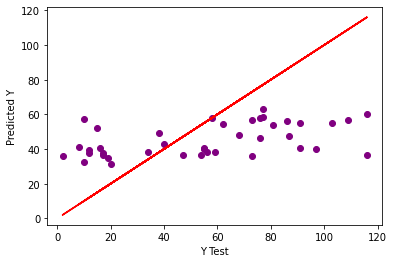

In [27]:
Fitfunction(RFR_grid.best_estimator_)

C:\Users\andre\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


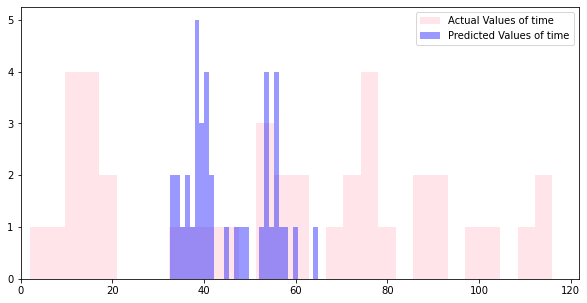

In [28]:
Histo_prediction_true(RFR_grid.best_estimator_)

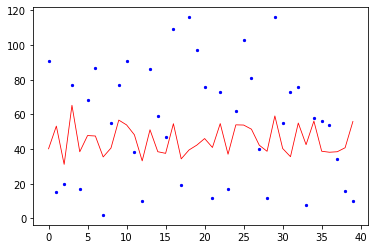

In [29]:
Pred_Real_Model(RFR_grid.best_estimator_)

In [30]:
regression_accuracy(RFR_grid.best_estimator_)

R2 score: 0.10867128663800751
Adjusted R2 score: -3.9659742601596717
__________________________________


# Conclussion
Random Forest are very well-known for falling in overfitting quite quickly. Due to this, the feature selection and the characteristics of the decision trees are critical for the precdictor model. The optimization process selected in this code provide no clear benefits neither improvement of the default model. The random nature of the first step via *SearchGridCV* cannot assure the likelihood of being near the best hyperparameters. Furthermore, it can actually accomplish the opposite goal.